In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drugs-a-b-c-x-y-for-decision-trees/drug200.csv


In [2]:
df = pd.read_csv(r"/kaggle/input/drugs-a-b-c-x-y-for-decision-trees/drug200.csv")

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
#Size and shape of the dataset
df.shape

(200, 6)

# Pre-Processing
- X as the Feature Matrix
- y as the response vector (target)

In [5]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

#### Converting categorical values like Sex or BP into numerical values because Sklean Decision Tree can't handle categorical values.

#### To Convert Categorical Values into Numerical Values, We gonna use *LabelEncoder() method*

> 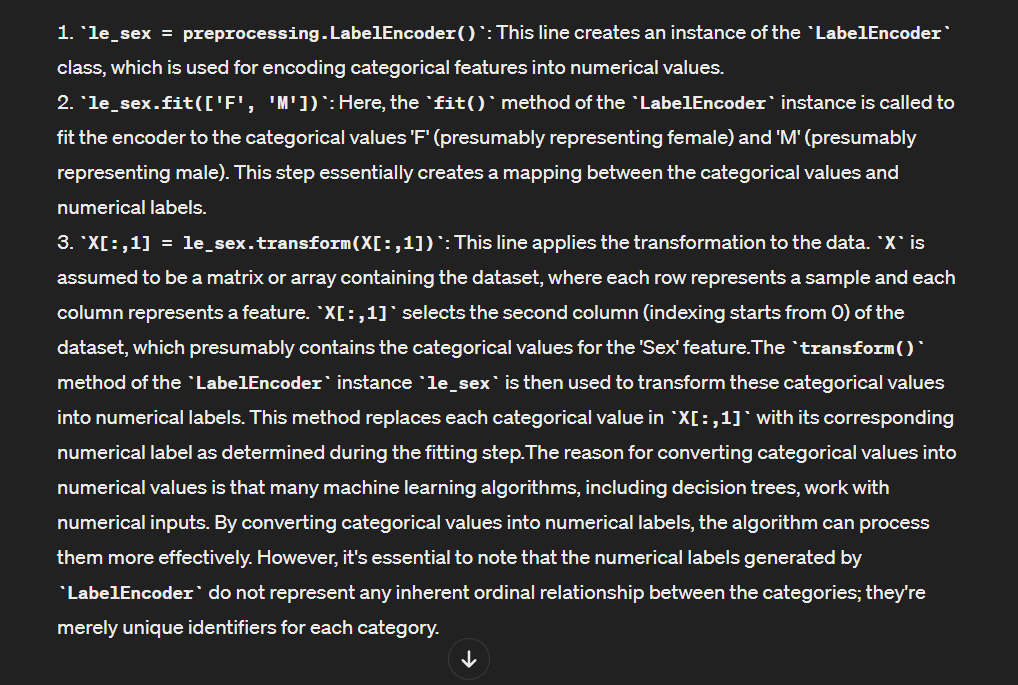

In [6]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder() #Creating an instance
le_sex.fit(['F', 'M']) #fit the label encoder to the categorical values
X[:,1] = le_sex.transform(X[:,1])

le_BP = preprocessing.LabelEncoder()
le_BP.fit(['LOW','NORMAL','HIGH'])
X[:,2] = le_BP.transform(X[:,2])

le_Chol = preprocessing.LabelEncoder()
le_Chol.fit(['NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3])

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [7]:
y = df['Drug']
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

## Decision Tree

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=3)

#### Creating an instance of the DecisionTreeClassifier with criterion set as entropy, so we can see the information gain of each node.

In [9]:
Drug_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Drug_tree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [10]:
Drug_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Prediction

In [11]:
Pred_Tree = Drug_tree.predict(X_test)

In [12]:
print(Pred_Tree[0:5]) #predicted otuput
print(y_test[0:5]) #actual values(actual output)

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


## Evaluation

In [13]:
from sklearn import metrics
import matplotlib.pyplot as plt

print("Decision Tree's Accuracy", metrics.accuracy_score(y_test, Pred_Tree)*100)

Decision Tree's Accuracy 98.33333333333333
